<a href="https://colab.research.google.com/github/AgustinCdeCelis/Weather-Lineal-Regression/blob/main/swegez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [42]:
link ='https://raw.githubusercontent.com/AgustinCdeCelis/Weather-Lineal-Regression/main/weatherHistory.csv'

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:

*   Time
*   Summary
*   PrecipType
*   Temperature
*   apparent Temperature
*   Humidity
*   WindSpeed
*   WindBearing
*   Visibility
*   LoudCover
*   Pressure

















**Características climáticas de Szeged**

La temporada templada dura 3,6 meses, del 26 de mayo al 14 de septiembre, y la temperatura máxima promedio diaria es más de 23 °C. El mes más cálido del año en Szeged es julio, con una temperatura máxima promedio de 28 °C y mínima de 15 °C.
La temporada fría dura 3,4 meses, del 23 de noviembre al 2 de marzo, y la temperatura máxima promedio diaria es menos de 8 °C. El mes más frío del año en Szeged es enero, con una temperatura mínima promedio de -3 °C y máxima de 3 °C.
En Szeged, el promedio del porcentaje del cielo cubierto con nubes varía considerablemente en el transcurso del año.
La parte más despejada del año en Szeged comienza aproximadamente el 30 de mayo; dura 4,2 meses y se termina aproximadamente el 5 de octubre.
El mes más despejado del año en Szeged es julio, durante el cual en promedio el cielo está despejado, mayormente despejado o parcialmente nublado el 74 % del tiempo.
La parte más nublada del año comienza aproximadamente el 5 de octubre; dura 7,8 meses y se termina aproximadamente el 30 de mayo.
El mes más nublado del año en Szeged es diciembre, durante el cual en promedio el cielo está nublado o mayormente nublado el 63 % del tiempo.






In [43]:
weather_df=pd.read_csv(link)
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [44]:
tamaño =weather_df.shape
print("el tamaño del Dataframe es ", tamaño)

el tamaño del Dataframe es  (96453, 12)


In [45]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [46]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Se analizan los Null-Values

In [47]:
pd.isnull(weather_df).sum()
#Como se puede observar la única variable que tiene Null_values es Precip Type

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

En primera medida, se pensó en cambiar el valor de los Null Values por "No Precip" pero como es un porcentaje bajo y la base de datos tiene 96453, preferimos borrar todas las filas, prefiriendo trabajar con variables binarias que con one hoting Encoding

In [48]:
weather_df =weather_df.dropna()
#eliminamos las Rows con Null Values

In [58]:
weather_df['Precip Type'].value_counts()
#Categorias de las variables

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [60]:
precip_code = {'rain':0,'snow':1}

In [65]:
weather_df['precip_code'] =weather_df['Precip Type'].map(precip_code)
#Codificamos de manera binaria la variable

In [49]:
weather_df['Loud Cover'].value_counts()
#como se puede observar los valores de esa variable son completamente intrascendentes.

0.0    95936
Name: Loud Cover, dtype: int64

In [50]:
weather_df=weather_df.drop(['Loud Cover',"Summary","Formatted Date","Daily Summary"],axis=1)
#Los eliminamos

In [66]:
weather_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip_code
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0
...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0


**Correlación entre las posibles features**

In [67]:
weather_df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip_code
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.563503
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037,-0.566058
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.232622
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.067771
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.042142
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.316483
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000,0.009271
precip_code,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271,1.000000


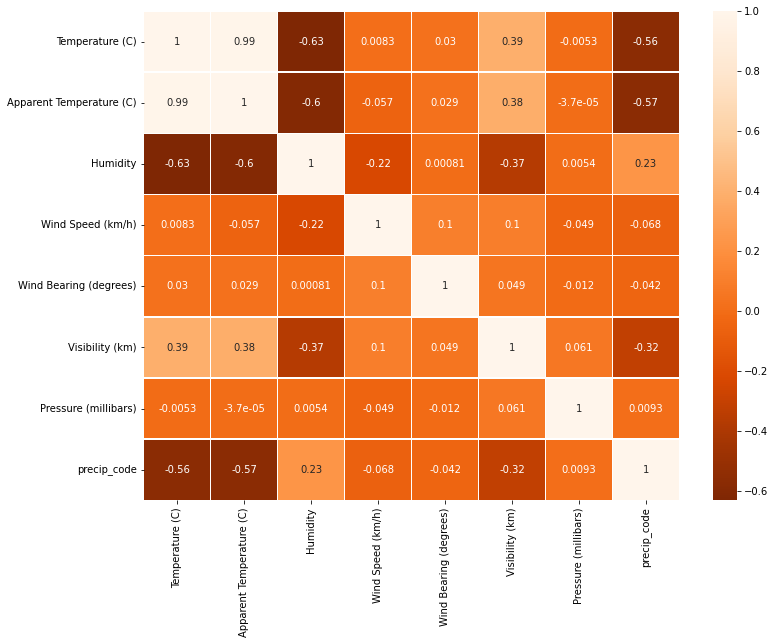

In [68]:
rcParams['figure.figsize'] = 12,9
sns.heatmap(weather_df.corr(),annot=True,cmap='Oranges_r',linewidth =.5 );


**Lineal Regression with one Feature**(a modo de muestra)

Decidimos no usar el Apparent Temperature(Sensación Térmica) porque no tendría ningún sentido en términos de análisis, es obvio que existiría una relación casi directa entre ambas.

In [80]:
label = weather_df['Temperature (C)']

In [82]:
feature = weather_df[['Humidity']]

In [75]:
model = LinearRegression()

In [83]:
model.fit(feature,label)

LinearRegression()

In [90]:
model.coef_

array([[-30.91125125]])

In [91]:
model.intercept_

array([34.65582848])

In [84]:
prediction = model.predict(feature)

In [86]:
RMSE = np.sqrt(mean_squared_error(label,prediction))
RMSE

7.415775494867574

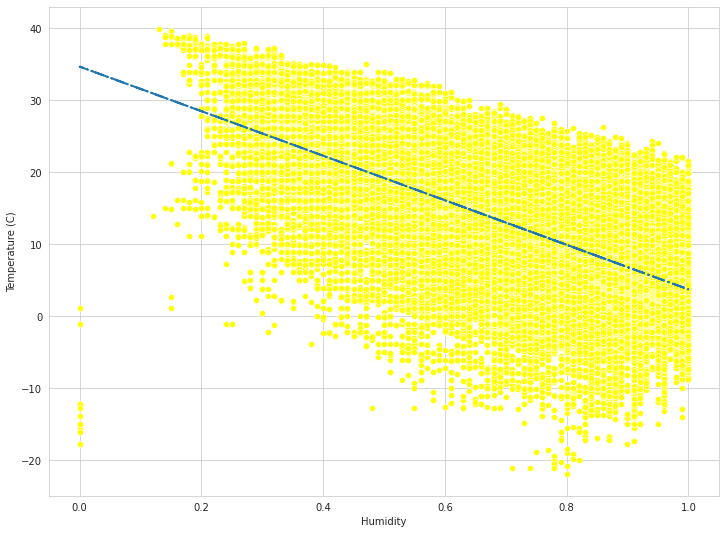

In [114]:
sns.set_style('whitegrid')
plt.plot( weather_df['Humidity'], prediction,linewidth=2,linestyle='-.')
sns.scatterplot(x=weather_df['Humidity'],y=weather_df['Temperature (C)'],color='yellow');

**Lineal Regression with Multiple Features**(aplicando Test Set)

In [116]:
x = weather_df[['Humidity','Visibility (km)','precip_code']]

In [117]:
y = weather_df['Temperature (C)']

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state =1)

In [120]:
model = LinearRegression()

In [121]:
model.fit(x_train,y_train)

LinearRegression()

In [122]:
predict_train = model.predict(x_train)

In [124]:
RMSE = np.sqrt(mean_squared_error(y_train,predict_train))
print("El error cuadrático medio es ",RMSE)

el error cuadrático medio es  6.144593566818679


In [128]:
model = sm.OLS(y_train,x_train.assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                 4.116e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        02:02:54   Log-Likelihood:            -2.7927e+05
No. Observations:               86342   AIC:                         5.586e+05
Df Residuals:                   86338   BIC:                         5.586e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Humidity          -24.8754      0.116   -2

Como se puede observar en el cuadro, no hay colinialidad, los p-value =0, r-squared y r-squared adjust son iguales. Ahora veremos el RMSE de la muestra del dataset.

In [129]:
model =LinearRegression()

In [130]:
model.fit(x_test,y_test)

LinearRegression()

In [131]:
predict_test=model.predict(x_test)

In [139]:
for name, coef in zip(x_test,model.coef_):
  print(f'The feature {name}:  Coef {coef:.2f}')

The feature Humidity:  Coef -24.11
The feature Visibility (km):  Coef 0.19
The feature precip_code:  Coef -12.87


In [135]:
RMSE_test = np.sqrt(mean_squared_error(y_test,predict_test))
print("El error cuadrático medio del test es ",RMSE_test)

El error cuadrático medio del test es  6.191089774405388


El coeficiente del modelo es:

In [143]:
for name, coef in zip(x,model.coef_):
  print(f'The feature {name}:  Coef {coef:.2f}')

The feature Humidity:  Coef -24.11
The feature Visibility (km):  Coef 0.19
The feature precip_code:  Coef -12.87


El intercept del modelo es:

In [145]:
print("el intercept del modelo es ",model.intercept_)

el intercept del modelo es  29.11846858938129
